# WEEK 5 PART A

In [7]:
import networkx as nx

# Load the graph from the file
G = nx.read_graphml("country_music_graph.graphml")


In [8]:
import networkx as nx

# Assuming 'G' is your graph
G = nx.read_graphml("country_music_graph.graphml")

# Convert to undirected graph if not already
G = G.to_undirected()

# Extract the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G_gcc = G.subgraph(largest_cc).copy()


In [9]:
from fa2_modified import ForceAtlas2

In [10]:
# Initialize ForceAtlas2 with custom parameters (you can tweak these)
forceatlas2 = ForceAtlas2(
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,
    adjustSizes=False,
    edgeWeightInfluence=1.0,
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,
    barnesHutTheta=1.2,
    scalingRatio=2.0,
    strongGravityMode=False,
    gravity=1.0,
    verbose=True
)

# Calculate node positions
positions = forceatlas2.forceatlas2_networkx_layout(G_gcc, iterations=2000)

100%|██████████| 2000/2000 [00:39<00:00, 50.37it/s]

BarnesHut Approximation  took  7.32  seconds
Repulsion forces  took  30.44  seconds
Gravitational forces  took  0.14  seconds
Attraction forces  took  0.30  seconds
AdjustSpeedAndApplyForces step  took  0.73  seconds


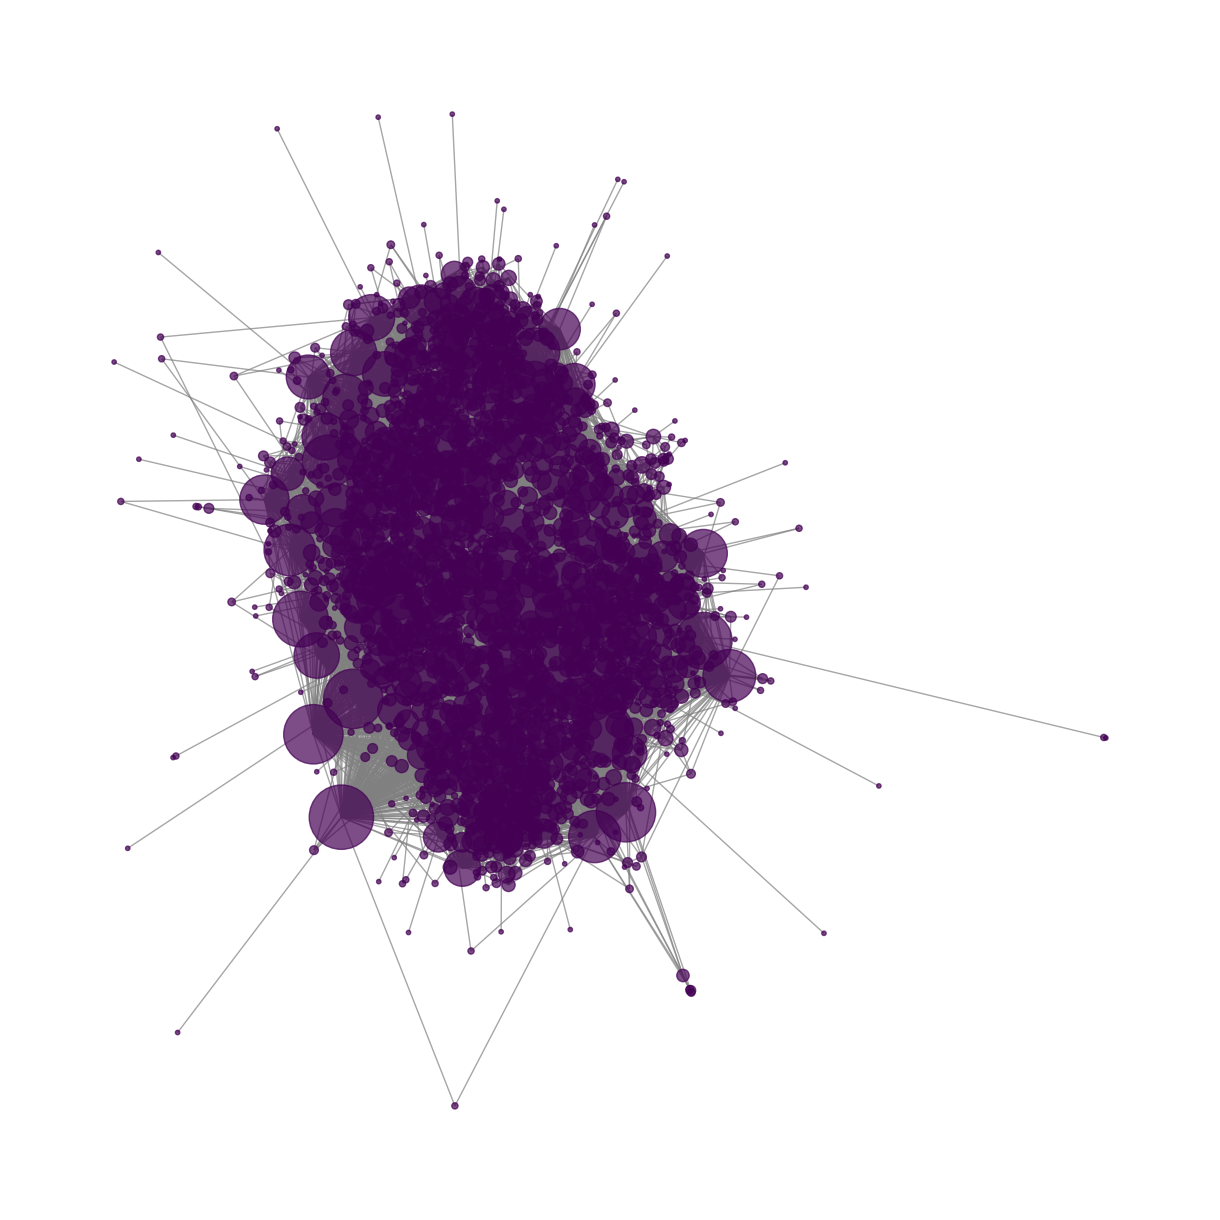

In [11]:
import matplotlib.pyplot as plt

# Get the degree of each node
degrees = dict(G_gcc.degree())

# Get the 'length_of_content' attribute
length_of_content = nx.get_node_attributes(G_gcc, 'length_of_content')

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(
    G_gcc,
    pos=positions,
    with_labels=False,
    node_size=[v * 10 for v in degrees.values()],  # Size by degree
    node_color=[length_of_content.get(node, 0) for node in G_gcc.nodes],  # Color by content length
    cmap=plt.cm.viridis,
    edge_color='gray',
    alpha=0.7
)

plt.show()


100%|██████████| 2000/2000 [00:39<00:00, 50.85it/s]


BarnesHut Approximation  took  7.68  seconds
Repulsion forces  took  29.75  seconds
Gravitational forces  took  0.14  seconds
Attraction forces  took  0.29  seconds
AdjustSpeedAndApplyForces step  took  0.72  seconds


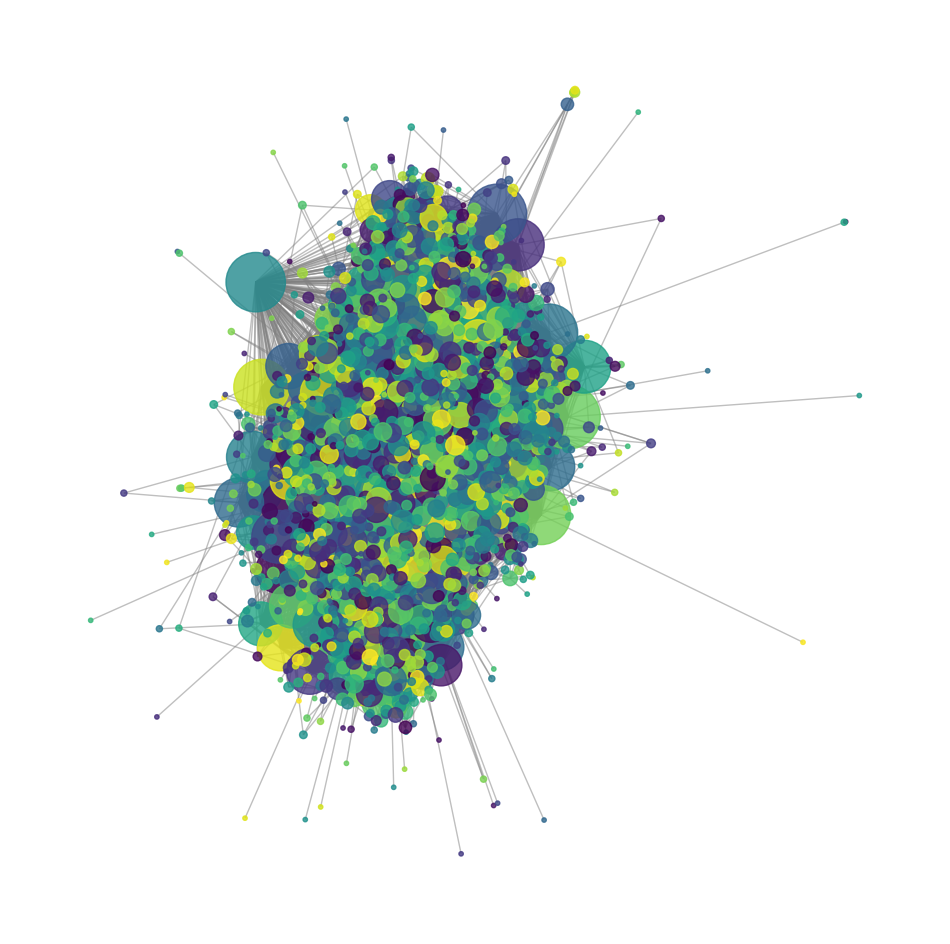

In [14]:
# Assuming you already have your graph 'G_fba'
# You can update this to your giant connected component if needed

import random

# If 'length_of_content' doesn't exist, assign a random value as a placeholder
for node in G_gcc.nodes():
    G_gcc.nodes[node]['length_of_content'] = random.randint(1, 100)

# Now, proceed with your plotting
node_colors = [G_gcc.nodes[node]['length_of_content'] for node in G_gcc.nodes()]


# Create ForceAtlas2 object with desired parameters
forceatlas2 = ForceAtlas2(
                        outboundAttractionDistribution=True,
                        edgeWeightInfluence=1.0,
                        jitterTolerance=1.0,
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        scalingRatio=2.0,
                        gravity=1.0,
                        verbose=True)

# Compute the positions using the ForceAtlas2 layout
positions = forceatlas2.forceatlas2_networkx_layout(G_gcc, pos=None, iterations=2000)

# Get node sizes based on degree
node_sizes = [G_gcc.degree(node) * 10 for node in G_gcc.nodes()]

# Assuming 'length_of_content' is an attribute of each node (as per your task)
# If not, you may need to add this data, or replace with another node attribute
node_colors = [G_gcc.nodes[node]['length_of_content'] for node in G_gcc.nodes()]

# Plot the graph using the calculated positions
plt.figure(figsize=(12, 12))
nx.draw_networkx_nodes(G_gcc, positions, node_size=node_sizes, node_color=node_colors, cmap=plt.cm.viridis, alpha=0.8)
nx.draw_networkx_edges(G_gcc, positions, edge_color="gray", alpha=0.5)
plt.axis('off')
plt.show()

In [16]:
# Get the in-degrees of all nodes
in_degrees = dict(G_gcc.in_degree())

# Find the node with the highest in-degree
max_in_degree_node = max(in_degrees, key=in_degrees.get)
print(f"The node with the highest in-degree: {max_in_degree_node}, In-degree: {in_degrees[max_in_degree_node]}")

# Check the neighbors (incoming links)
incoming_neighbors = list(G_gcc.predecessors(max_in_degree_node))
print(f"Nodes pointing to the highest in-degree node: {incoming_neighbors}")


AttributeError: 'Graph' object has no attribute 'in_degree'